# PC lab 3: Linear Regression

## 1 Introduction

The goal of linear regression is to model the relationship between one or more features *x* and a **continuous** variable *y*. When there is only one feature $x_1$ (univariate linear regression), the equation of the regression line is:

<center>$\hat{y} = w_{0} + w_{1}x_{1}$


where $w_{0}$ is the intercept on the y-axis, or bias. In the case of multiple features, we talk about multiple linear regression, and y is modelled as a linear combination of the features, weighted by some set of weights w:

<center>$\hat{y} = w_{0}x_{0} + w_{1}x_{1} + ... + w_{p}x_{p} = \sum\limits_{i=0}^{p}w_{i}x_{i}$,

In this notation, we introduced an additional feature $x_{0}$ which always equals 1. This notation allows to formulate linear regression as a matrix multiplication:

<center>$\mathbf{\hat{y}} = \mathbf{X}\mathbf{w}$,

where $\mathbf{\hat{y}}$ (a vector of dimension $n \times 1$) contains the predicted target variable for the $n$ instances, $\mathbf{w}$ is a $p \times 1$ vector containing the weights and $\mathbf{X}$ is a $n \times (p+1)$ matrix with the features. Note that the first column of $\mathbf{X}$ is a column of ones, because it represents the feature $x_{0}$ that we introduced to go with the intercept. We will stick to this matrix notation for the rest of this lab, as this notation is common practice in machine learning. Also, this notation makes it much easier to translate an algorithm into python code. Make sure that you understand it.

Fitting this model to a set of data comes down to finding the weight vector $\mathbf{w}$ that minimizes the discrepancy between the true target values $\mathbf{y}$ and the predictions $\hat{\mathbf{y}}$. As is often the case in regression problems, this discrepancy between true values and predicted values is expressed by the total sum of squared errors or the **residual sum of squares (RSS)**:

<center>$RSS = \sum\limits_{i=1}^{n}(\hat{y}_{i} - y_{i})^2$,

or, equivalently:

<center>$RSS = (\mathbf{y} - \mathbf{Xw})^{T}(\mathbf{y} - \mathbf{Xw})$

Note that the mean sum of squares (MSE) is perfectly equivalent to the RSS.


For most machine learning algorithms we need an optimization algorithm such as gradient descent to find the set of weights that minimize the discrepancy between true and predicted values. However, for linear regression there is a convenient analytical solution to find the optimal weight vector $\mathbf{w}$ that minimizes the RSS. This solution is obtained by solving the so-called normal equations, leading to the following expression:

<center>$\mathbf{w_{OLS}} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

This solution is called the ordinary least squares or OLS solution. With this equation in our toolbox, we can fit a linear regression model to a toy dataset. Let's first simulate some datapoints from a linear ground truth, but with some Gaussian noise $\epsilon$ added to the observations. We will use only one feature $x$ so that we can visualize the regression line.

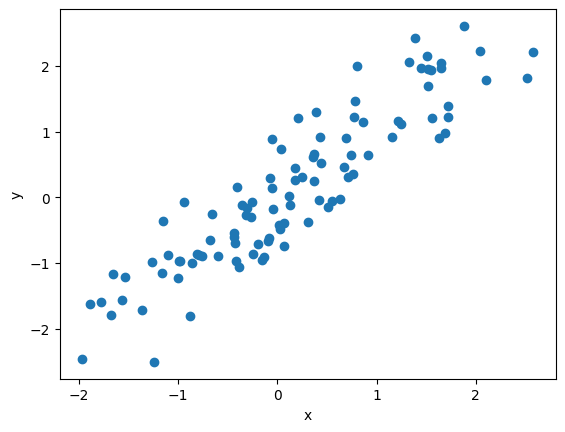

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

x = np.random.randn(100) # sample of a hundred random gaussian points
y = x + np.random.randn(100)/2 # simulating an output: y = X + some noise

fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_xlabel('x');
ax.set_ylabel('y');

Now, let's use linear regression to model $y$ as a function of $x$. We can use the analytic result from the normal equations to find the optimal weight vector $\mathbf{w_{OLS}} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$. NumPy makes easy work of this.

First, let's create a feature matrix with an intercept. (Remember, we are fitting $\hat{y} = w_{0} + w_{1}x_{1}$, which is equivalent to having $\hat{y} = w_{0}*1 + w_{1}x_{1}$)

In [2]:
# Put the features in a matrix, with a column of ones for the intercept
X = np.ones((100,2))
X[:,1] = x

print(X.shape)
print(X[:5])

(100, 2)
[[ 1.          0.06294724]
 [ 1.         -0.35181076]
 [ 1.         -0.04394156]
 [ 1.         -1.2605073 ]
 [ 1.          1.6903211 ]]


Now we can estimate the weights of the linear model via: $\mathbf{w_{OLS}} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$.
Using NumPy:

In [3]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
print(w)

[-0.02744038  1.01893024]


We find the weight vector that minimizes the MSE between observations and predictions. With this weight matrix, we have succesfully "trained" a predictive model. We can now use this model to make predictions. Let's say we have a new data point that we do not know the output for:

In [4]:
X_new = np.array([1, np.random.randn()])
X_new

array([ 1.        , -1.26099594])

In [5]:
y_pred = np.matmul(X_new, w)
y_pred

-1.3123072770438662

**Remember**: the primary goal of machine learning is to make predictions for new data as well as possible. This contrasts with the goal in statistics, where one would - typically - derive p-values of the estimated parameters at this point, to infer if the data supports evidence for there being a trend.

This goal makes us care less about underlying assumptions. If, for a statistician, an assumption is violated, the resulting estimated p-value may reflect false associations, and the study is invalidated. For a ML practitioner, violated assumptions typically just mean our model could be made better still.

To evaluate a Machine learning model, we need data separate from the data we trained on (after all, we are interested in knowing how good the model is on new data). In machine learning terms, we call this a "test set". Let's simulate one and make predictions:

In [6]:
X_test = np.array([[1] * 100, np.random.randn(100)]).T
y_test = X_test[:,1] + np.random.randn(100)/2

y_hat = np.matmul(X_test, w)

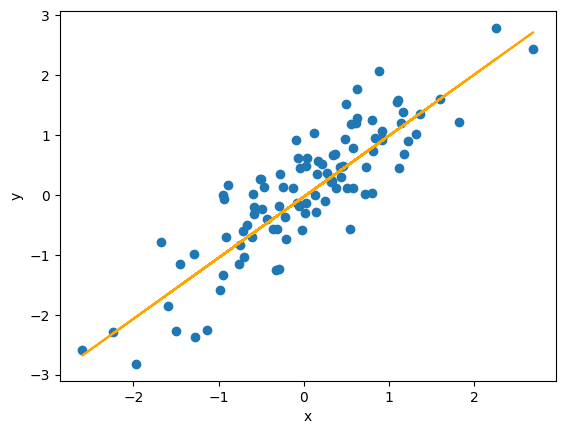

In [7]:
fig, ax = plt.subplots()
ax.scatter(X_test[:,1],y_test);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.plot(X_test[:,1], y_hat, color='orange');

We can evaluate the performance of our model by computing the MSE:

In [8]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return np.mean((y_true-y_predicted)**2)

MSE = compute_MSE(y_test, y_hat)
print('Mean squared error: {}'.format(MSE))


Mean squared error: 0.2857778927961952


Alternatively, we can evaluate by using the mean absolute error (MAE):

In [9]:
# Function to compute MSE
def compute_MAE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return np.mean(np.abs(y_true-y_predicted))

MAE = compute_MAE(y_test, y_hat)
print('Mean squared error: {}'.format(MAE))


Mean squared error: 0.42681457457428074


## 2 Application: predicting house prices

We will use a [housing dataset](https://www.kaggle.com/harlfoxem/housesalesprediction) hosted on Kaggle for a practical illustration, slightly modified for the purpose of this PC lab. The dataset contains the price of 21613 houses in US dollars, together with the following features:
1. **categorical features** (discrete categories): waterfront yes/no, color (yellow, blue, white or 'other')
2. **ordinal features** (take on discrete values, but there is a natural ordering, unlike categorical features): number of bedrooms, bathrooms, floors, yr_built
3. **continuous features**: surface areas: sqft_living, sqft_lot, sqft_above, sqft_basement, and latitude, longitude

We would like to build a model that can predict the price of a house based on these features. First, let's read in the data:

In [10]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/BioML-UGent/MLLS/main/03_linear_regression/pc3_housingdata_modified.csv')
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,lat,long,color
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,1955,47.5112,-122.257,yellow
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,1951,47.7210,-122.319,other
2,180000.0,2,1.00,770,10000,1.0,0,770,0,1933,47.7379,-122.233,blue
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910,1965,47.5208,-122.393,yellow
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0,1987,47.6168,-122.045,other


In [11]:
len(data)

21613

Let's visualize some features to get an idea of what this data looks like:

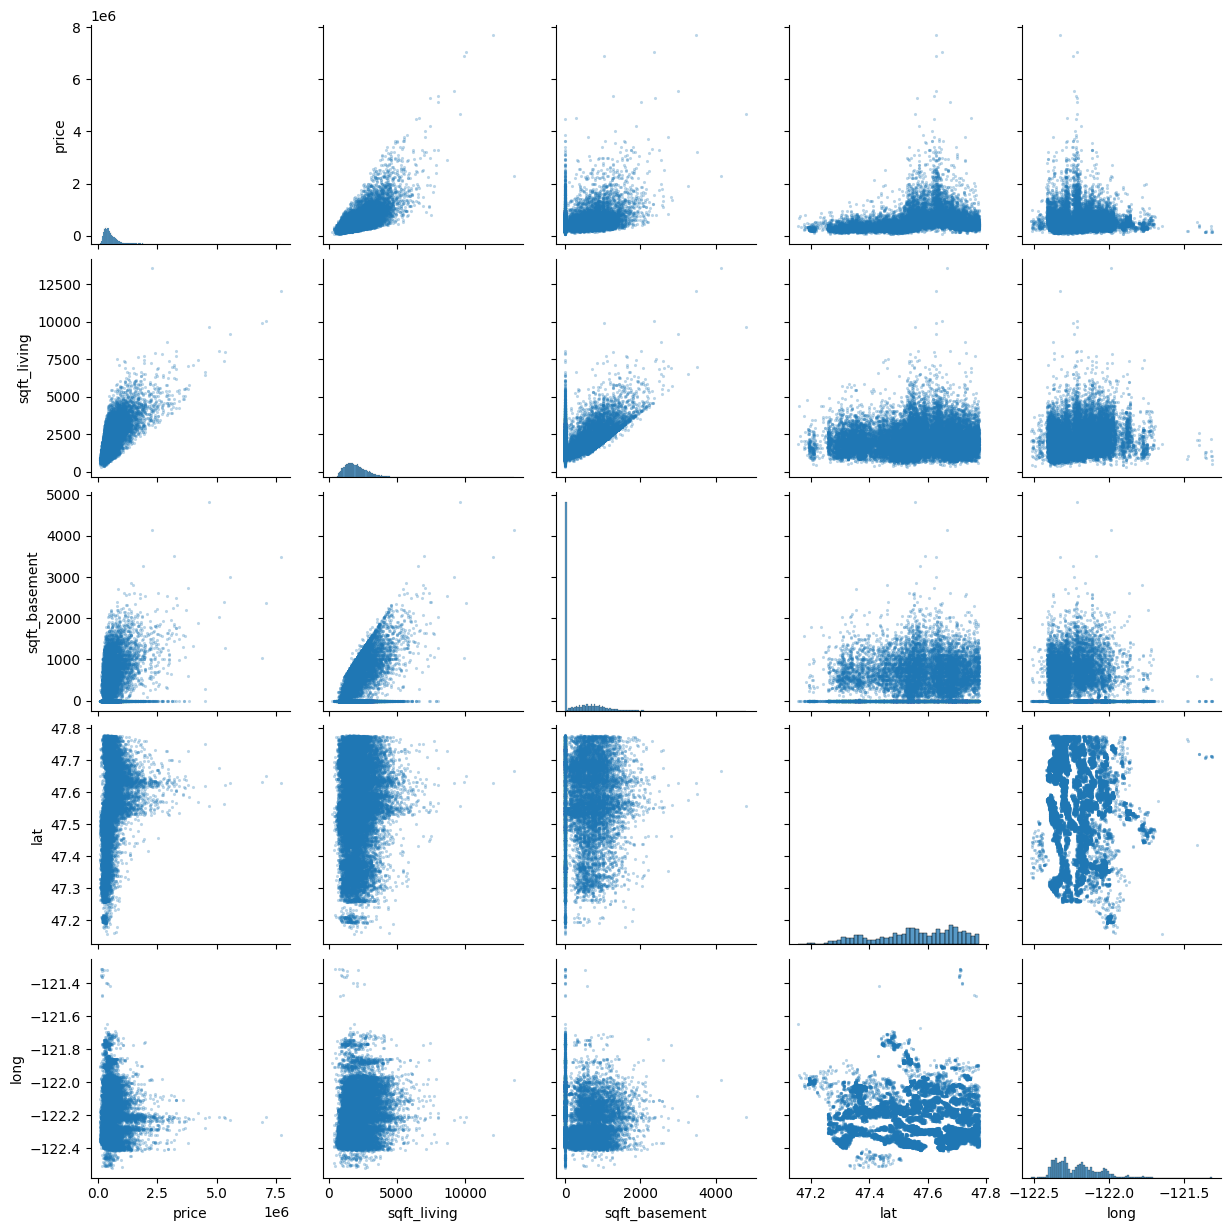

In [12]:
import seaborn as sns
sns.pairplot(data.loc[:,['price', 'sqft_living', 'sqft_basement', 'lat', 'long']], plot_kws = {'alpha': 0.3, 'linewidth' : 0, "s": 5});

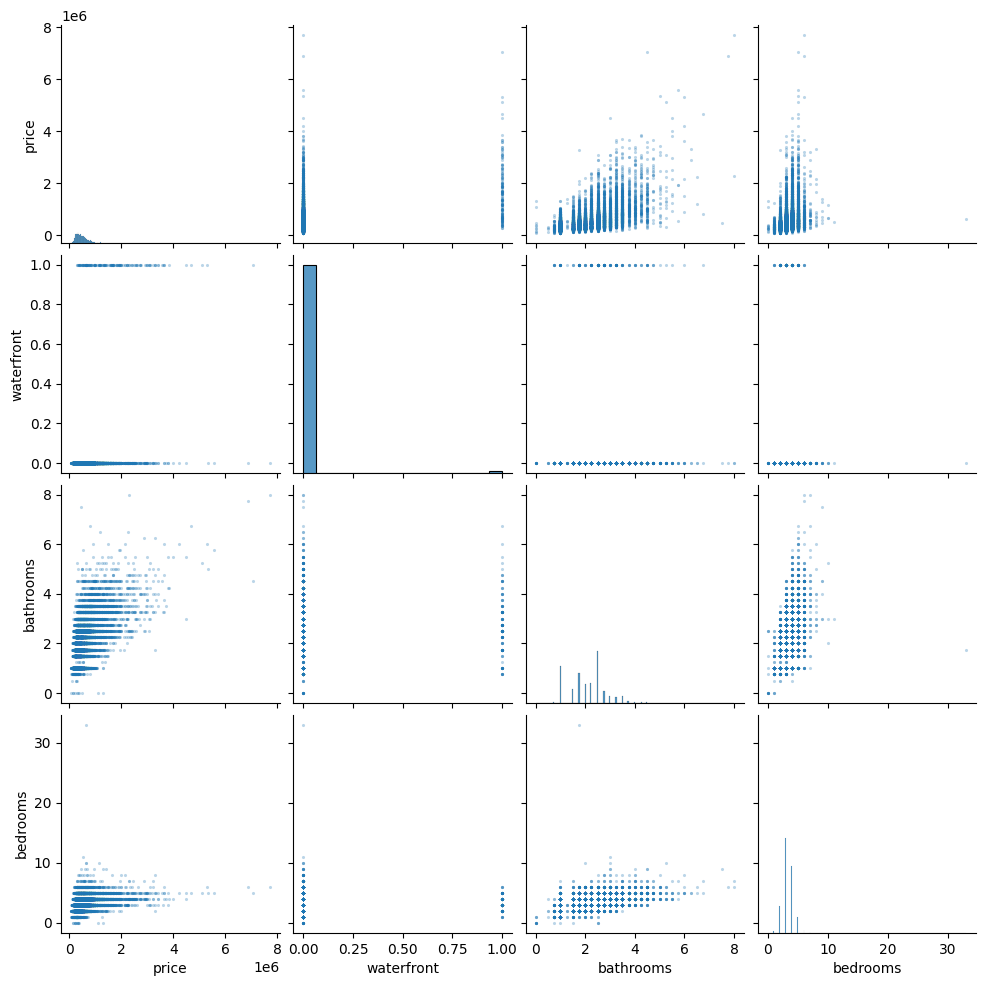

In [13]:
sns.pairplot(data.loc[:,['price','color', 'waterfront', 'bathrooms', 'bedrooms']], plot_kws = {'alpha': 0.3, 'linewidth' : 0, "s": 5})

There are different types of features here. How can we use the color attribute in a linear regression model? In general, dummy variables are introduced to encode categorical features. In machine learning, this is more often called **one-hot encoding**. It turns out that both [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) have functions that can do this trick. Let's use pandas, since it can handle text features:

In [14]:
dummies = pd.get_dummies(data.color)
dummies.head()

,blue,other,white,yellow
0,False,False,False,True
1,False,True,False,False
2,True,False,False,False
3,False,False,False,True
4,False,True,False,False


Let's add these encoded features to the dataframe:

In [15]:
data_onehot = pd.concat([data, dummies], axis=1)
data_onehot = data_onehot.drop(['color'], axis=1) # remove the original color column
data_onehot.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,lat,long,blue,other,white,yellow
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,1955,47.5112,-122.257,False,False,False,True
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,1951,47.7210,-122.319,False,True,False,False
2,180000.0,2,1.00,770,10000,1.0,0,770,0,1933,47.7379,-122.233,True,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910,1965,47.5208,-122.393,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0,1987,47.6168,-122.045,False,True,False,False


We can use these dummy variables in a linear regression model. First, it's good to extract the data from the pandas dataframe into numpy arrays, since most machine learning APIs are compatible with numpy.

In [16]:
# Put data in numpy arrays
y = data_onehot.price.values
X = data_onehot.drop('price', axis=1).values

Finally, we would like to evaluate the performance of our data on new, unseen data, that was not used to train the model. Therefore, we split up our dataset into a training and a test dataset:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) # Use 70% of data for training

To fit any type of ML model, we recommend the industry-standard sklearn library.
Take a look at the documentation for its [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to learn how to apply it.

<div class="alert alert-success">
<b>EXERCISE:</b>
<p> Using the documentation linked above, complete the code below to train a linear regression model on the training set and then evaluate it on the test set.</p>
</div>

In [18]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression() # call an instance of the class LinearRegression
LinReg.fit(X_train, y_train) # fit the model on the training data

y_pred = LinReg.predict(X_test) # make predictions for the test data
MAE = compute_MAE(y_test, y_pred) # compute the MAE
print('Test set MAE: {}'.format(MAE))

Test set MAE: 137833.19501087323


Creating the model and evaluating it is typically only the first step.
Let's dig in some more to the model to know if some stuff is going wrong.

First, let's see if we are **overfitting** the model. An overfit means that the model is learning patterns on the training set that are not directly applicable to the test set. This is the case if the error that the model makes on the training set is a lot lower than on the test set.

In [19]:
y_pred = LinReg.predict(X_train) # make predictions for the test data

MAE = compute_MAE(y_train, y_pred) # compute the MAE
print('Train set MAE: {}'.format(MAE))

Train set MAE: 140871.5427829607


The error you see should be about as big on the train set than it is on the test set. This is good news, our model is not to overly complex. Still, how happy are we with our model? Let's evaluate with another score. The **R2 score** evaluates the proportion of variability in the output is captured by the model. A score of 1 means all variability in house prices is captured (perfect predictions), a score of 0 means our model is no better than just guessing the mean house price.

In [20]:
from sklearn.metrics import r2_score

y_pred = LinReg.predict(X_test) # make predictions for the test data

r2 = r2_score(y_test, y_pred) # compute the MAE
print('Test set r2 score: {}'.format(r2))

Test set r2 score: 0.6459917977650671


Our model explains ~60-65 percent of variability in house prices. Quite okay, but can probably be improved. Before we try do so, let's look a bit deeper in the model.

A question one might ask is, if the model is making bad predictions for one type of house price (e.g. specifically the more expensive houses). Let us investigate by making a **predicted vs actual plot**

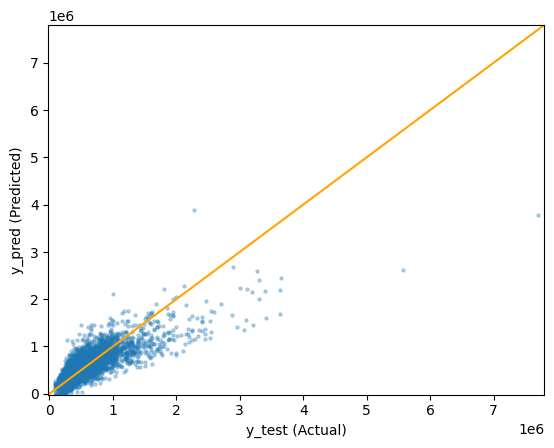

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, s = 5, alpha = 0.3);
ax.set_xlabel('y_test (Actual)');
ax.set_ylabel('y_pred (Predicted)');
ax.plot(np.arange(y_test.min()-1e5, y_test.max()+1e5), np.arange(y_test.min()-1e5, y_test.max()+1e5), color='orange');
plt.xlim([y_test.min()-1e5, y_test.max()+1e5]);
plt.ylim([y_test.min()-1e5, y_test.max()+1e5]);

<div class="alert alert-success">
<b>THOUGHT EXERCISE:</b>
<p> Interpret the plot, what is going wrong with the model?</p>
</div>

As a last step, let's check the coefficients of the model to see if everything makes sense to us:

In [22]:
coefficients = LinReg.coef_
feature_names = data_onehot.drop("price", axis =1).columns.values
for name, coef in zip(feature_names, coefficients):
    print(name, "\t", coef)

bedrooms 	 -50324.91166572082
bathrooms 	 60319.68619414854
sqft_living 	 179.52739367790127
sqft_lot 	 0.023565656643768307
floors 	 9234.022571903293
waterfront 	 778245.507766075
sqft_above 	 118.1547642267069
sqft_basement 	 61.37262938709409
yr_built 	 -2131.1067529694387
lat 	 620267.3547115986
long 	 -187675.75205792105
blue 	 -12632.145518941103
other 	 -7693.045432248038
white 	 26160.737228601323
yellow 	 -5835.546277411802


<div class="alert alert-success">
<b>THOUGHT EXERCISE:</b>
<p> Interpret the learned weights. Do they make sense? Does it even make sense to learn a linear relation between all of these features and house prices? Can you come up with a more appropriate solution to learn the impact of: (1) latitude and longitude?, (2) correlated features such as numbers of bedrooms and bathrooms? (3) differing feature numerical ranges?</p>
</div>

In the remainder of the PC lab, we will tackle the issue of learning non-linear effects.

## 3 Expanding the model

### 3.1 Polynomial feature expansion: Interaction and non-linear effects

We can model non-linear relations by performing some non-linear transformation $\phi(\mathbf{x})$ on the original features $\mathbf{x}$. This is known as a **basis function expansion**. An example of such a transformation are polynomial basis functions, where we consider higher-order powers of the original features:

$\phi(x) = [1, x, x^2, x^3,...,x^d]$

It is important to note here that, although we use non-linear transformations, the model linear regression model $y = f(\phi(x)$ will still be linear in the parameters:

$\hat{y} = w_{10}x_{0} + w_{11}x_{1} + w_{12}x_{1}^2 ... + w_{md}x_{m}^d$

This means that the solution will still be a line, be it in a transformed and typically higher-dimensional space instead of in the original feature space. This also means that we obtain the least-squares solutions just as we did earlier on.

With different feature expansions, we can strongly improve the performance of linear regression by taking into account interaction effects, quadratic or cubic effects... However, the risk of overfitting also increases!

In scikit-learn, [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) can generate both polynomial features as well as interaction effects.

<div class="alert alert-success">
<b>EXERCISE:</b>
<p> Using the documentation. Expand the previous analysis with Polynomial Features. You have to fit the polynomial feature object on the train data and transform it before feeding it to the training function of the model.</p>
</div>

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print("Shape before polynomial feature expansion:", X_train.shape)
print("Shape after polynomial feature expansion:", X_train_poly.shape)

LinReg = LinearRegression() # call an instance of the class LinearRegression
LinReg.fit(X_train_poly, y_train) # fit the model on the training data

y_pred = LinReg.predict(X_test_poly) # make predictions for the test data
MAE = compute_MAE(y_test, y_pred) # compute the MAE
print('Test set MAE: {}'.format(MAE))

y_pred = LinReg.predict(X_train_poly)
MAE = compute_MAE(y_train, y_pred) # compute the MAE
print('Train set MAE: {}'.format(MAE))

Shape before polynomial feature expansion: (15129, 15)
Shape after polynomial feature expansion: (15129, 136)
Test set MAE: 117176.92163000855
Train set MAE: 120357.76603876619


In [24]:
from sklearn.metrics import r2_score

y_pred = LinReg.predict(X_test_poly) # make predictions for the test data

r2 = r2_score(y_test, y_pred) # compute the MAE
print('Test set r2 score: {}'.format(r2))

Test set r2 score: 0.7265553328820522


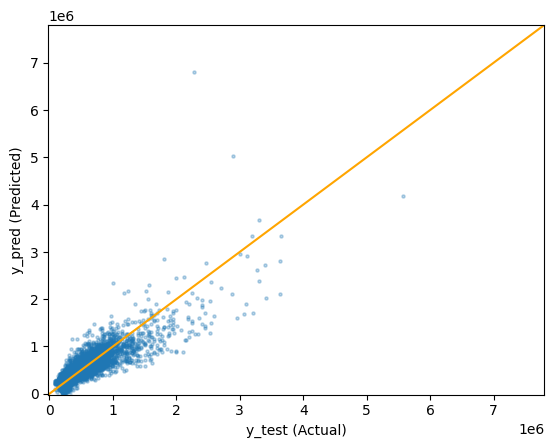

In [25]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, s = 5, alpha = 0.3);
ax.set_xlabel('y_test (Actual)');
ax.set_ylabel('y_pred (Predicted)');
ax.plot(np.arange(y_test.min()-1e5, y_test.max()+1e5), np.arange(y_test.min()-1e5, y_test.max()+1e5), color='orange');
plt.xlim([y_test.min()-1e5, y_test.max()+1e5]);
plt.ylim([y_test.min()-1e5, y_test.max()+1e5]);

Our model should have successfully improved. Notice that we have chosen a polynomial degree of 2. In effect, this is a choice we have made, which we could additionally tune.
In machine learning, we make a distinction between parameters (things learned by optimization of model parameters) and **hyperparameters**. The polynomial degree we have chosen is an example of the latter. Typically, we can try to find the best hyperparameter through **tuning**. This is a process that, in its simplest form, just loops through a possible set of values. For each value, trains and evaluates a model, and then takes the best hyperparameter value as final.

Let's find the best polynomial degree hyperparameter:

<div class="alert alert-success">
<b>EXERCISE:</b>
<p> Plug in the code of the previous exercise in the code below. Make it so that the degree argument of PolynomialFeatures isn't fixed, but is instead looped over. What is the effect on train / test performance on the degree parameter? Does that make sense to you?</p>
</div>

In [27]:
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    print("Shape before polynomial feature expansion:", X_train.shape)
    print("Shape after polynomial feature expansion:", X_train_poly.shape)

    LinReg = LinearRegression() # call an instance of the class LinearRegression
    LinReg.fit(X_train_poly, y_train) # fit the model on the training data

    y_pred = LinReg.predict(X_test_poly) # make predictions for the test data
    MAE = compute_MAE(y_test, y_pred) # compute the MAE
    print('Test set MAE: {}'.format(MAE))

    y_pred = LinReg.predict(X_train_poly)
    MAE = compute_MAE(y_train, y_pred) # compute the MAE
    print('Train set MAE: {}'.format(MAE))

Shape before polynomial feature expansion: (15129, 15)
Shape after polynomial feature expansion: (15129, 16)
Test set MAE: 137833.19501087774
Train set MAE: 140871.54278296098
Shape before polynomial feature expansion: (15129, 15)
Shape after polynomial feature expansion: (15129, 136)
Test set MAE: 117176.92163000855
Train set MAE: 120357.76603876619
Shape before polynomial feature expansion: (15129, 15)
Shape after polynomial feature expansion: (15129, 816)
Test set MAE: 133085.72126552902
Train set MAE: 126962.82160461592
Shape before polynomial feature expansion: (15129, 15)
Shape after polynomial feature expansion: (15129, 3876)
Test set MAE: 137391.1905585264
Train set MAE: 119670.75815564471
